In [94]:
import math 
import scipy.stats as st
tol = 1e-9
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
class Tester:
    def testCase1():
        try:
            assert("df_1" in globals()
                  ), "You should have a dataframe called `df_1`"
            
            
            assert(len(df_1) == len(pd.read_csv("https://evantsiamalos.github.io/material/datasets/sleep.csv"))
                  ), "The dataframe that you loaded is not correct"
            m1_ = df_1["Hours of sleep"].mean()

            v1_ = df_1["Hours of sleep"].var()

            n1_ = len(df_1)

            a1_ = 1 - 0.95

            za1_ = st.norm(0,1).ppf(1-a1_/2)
            ans_a_1 = m1_ - za1_ * math.sqrt(v1_/n1_)
            ans_b_1 = m1_ + za1_ * math.sqrt(v1_/n1_)
            
            assert("a_1" in globals()
                  ), "You should have a variable called `a_1`"
            assert("b_1" in globals()
                  ), "You should have a variable called `b_1`"
            assert(
                (ans_a_1 == a_1) or (math.isclose(ans_a_1,a_1)) and 
                ( (ans_b_1 == b_1) or (math.isclose(ans_b_1,b_1)))
            ), "The calculation of the confidence interval is not correct"

            print(f"\N{PARTY POPPER} All tests passed! \N{PARTY POPPER}")
        except AssertionError as msg:
            print(f'{bcolors.FAIL} ---------- ERROR ---------- {bcolors.ENDC}')
            print(msg)
            

    def testCase2():
        try:
            assert("df_2" in globals()
                  ), "You should have a dataframe called `df_2`"
            
            
            assert(len(df_2) == len(pd.read_csv("https://evantsiamalos.github.io/material/datasets/ds_salaries.csv"))
                  ), "The dataframe that you loaded is not correct"
            
            
            assert("df_2_clean" in globals()
                  ), "You should have a dataframe called `df_2_clean`"
            
            col_ = df_2["salary_in_usd"]
            q1_ = col_.quantile(0.25)
            q3_ = col_.quantile(0.75)
            IQR_ = q3_-q1_
            
            clean_dataset_ = df_2[
    (df_2["salary_in_usd"] >= q1_ - 1.5*IQR_) & (df_2["salary_in_usd"] <= q3_ + 1.5*IQR_)
]

            assert(len(df_2_clean) == len(clean_dataset_)
                  ), "The `df_2_clean` dataframe is not correct"
            

            
            
            m2_ = df_2_clean["salary_in_usd"].mean()

            v2_ = df_2_clean["salary_in_usd"].var()

            n2_ = len(df_2_clean)

            a2_= 1 - 0.99

            za2_ = st.norm(0,1).ppf(1-a2_/2)
            
            ans_a_2 = m2_ - za2_ * math.sqrt(v2_/n2_)
            ans_b_2 = m2_ + za2_ * math.sqrt(v2_/n2_)
            assert("a_2" in globals()
                  ), "You should have a variable called `a_2`"
            assert("b_2" in globals()
                  ), "You should have a variable called `b_2`"
            assert(
                (ans_a_2 == a_2) or (math.isclose(ans_a_2,a_2)) and 
                ( (ans_b_2 == b_2) or (math.isclose(ans_b_2,b_2)))
            ), "The calculation of the confidence interval is not correct"

            print(f"\N{PARTY POPPER} All tests passed! \N{PARTY POPPER}")
        except AssertionError as msg:
            print(f'{bcolors.FAIL} ---------- ERROR ---------- {bcolors.ENDC}')
            print(msg)

            
    def testCase3():
        try:
            assert("df_3" in globals()
                  ), "You should have a dataframe called `df_3`"
            
            
            assert(len(df_3) == 100
                  ), "The dataframe `df_3` that  is not correct"
            m3_ = df_3["answers"].mean()

            v3_ = df_3["answers"].var()

            n3_ = len(df_3)

            a3_ = 1 - 0.9

            za3_ = st.norm(0,1).ppf(1-a3_/2)
            ans_a_3 = m3_ - za3_ * math.sqrt(v3_/n3_)
            ans_b_3 = m3_ + za3_ * math.sqrt(v3_/n3_)
            
            assert("a_3" in globals()
                  ), "You should have a variable called `a_3`"
            assert("b_3" in globals()
                  ), "You should have a variable called `b_3`"
            assert(
                (ans_a_3 == a_3) or (math.isclose(ans_a_3,a_3)) and ((ans_b_3 == b_3) or (math.isclose(ans_b_3,b_3)))
            ), "The calculation of the confidence interval is not correct"

            print(f"\N{PARTY POPPER} All tests passed! \N{PARTY POPPER}")
        except AssertionError as msg:
            print(f'{bcolors.FAIL} ---------- ERROR ---------- {bcolors.ENDC}')
            print(msg)


# Exercises on Confidence Intervals

## Exercise 1

In the following link there you will find a dataset that contains the data from a questionairy with regards to the ammount of sleep that students get every night.  

> https://evantsiamalos.github.io/material/datasets/sleep.csv


Load the dataset into a dataframe called `df_1`.

In [2]:
import pandas as pd

df_1 = pd.read_csv("https://evantsiamalos.github.io/material/datasets/sleep.csv")
df_1

,Hours of sleep
0,7.0
1,7.5
2,8.0
3,8.0
4,4.0
...,...
368,10.0
369,8.0
370,8.0
371,7.0


Using `df_1` build a $95\%$ confidence interval $(a_1,b_1)$ for the average ammount of sleep that a student gets every night. 

- Store the left endpoint of the interval into a variable called `a_1`
- Store the right endpoint of the interval into a variable called `b_1`

In [39]:
## Find the confidence interval
import scipy.stats as st
import math

sample_mean_1 = df_1["Hours of sleep"].mean()

sample_var_1 = df_1["Hours of sleep"].var()

sample_size_1 = len(df_1)

a = 1 - 0.95

z_a = st.norm(0,1).ppf(1-a/2)
z_a



1.959963984540054

In [40]:
a_1 = sample_mean_1 - z_a * math.sqrt(sample_var_1/sample_size_1)
b_1 = sample_mean_1 + z_a * math.sqrt(sample_var_1/sample_size_1)

print(a_1, b_1)

7.080285354107741 7.39960740728636


### Test

In [53]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
# import urllib
# _j = "https://evantsiamalos.github.io/material/assignment_11/assignment11_tester.py"
# _ = urllib.request.urlopen(_j).read()
# exec(_)
Tester.testCase1()

🎉 All tests passed! 🎉


# Exercise 2
For this exercise we are going to analyse salaries of data scientists. 

> https://evantsiamalos.github.io/material/datasets/ds_salaries.csv

Load the dataset into a dataframe called `df_2`.

In [9]:
df_2=pd.read_csv("https://evantsiamalos.github.io/material/datasets/ds_salaries.csv")
df_2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Task 1

We are interested in the column called `salary_in_usd`. Before we build a cnfidence interval, we should check whether we have outliers in the dataset with respect to the salary. 

Create a box-plot for the `salary_in_usd` column. Are there any **outliers**?


<AxesSubplot:>

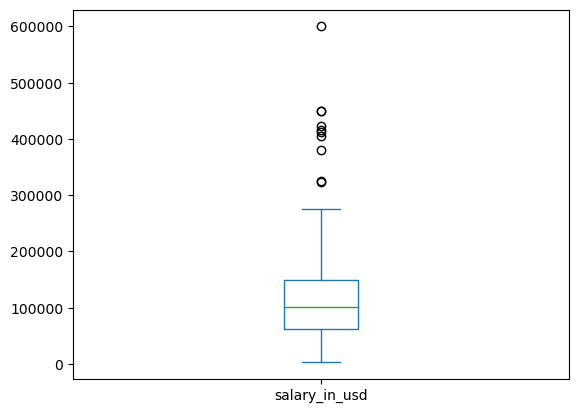

In [12]:
## Create the box-plot in this  cell

df_2["salary_in_usd"].plot.box()

### Task 2

We are going to get rid of the outliers. Create a new dataframe called `df_2_clean` where you keep only the rows of `df_2` that are **not** outliers with respect to the `salary_in_usd` column. 

**Reminder:** An observation is an outlier if it is 
- $> Q_3 + 1.5\cdot IQR$

or

- $ <  Q_1 - 1.5\cdot IQR$



In [45]:
col = df_2["salary_in_usd"]
q1 = col.quantile(0.25)
q3 = col.quantile(0.75)
IQR = q3-q1

df_2_clean = df_2[
    (df_2["salary_in_usd"] >= q1 - 1.5*IQR) & (df_2["salary_in_usd"] <= q3 + 1.5*IQR)
]

df_2_clean

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Task 3

Using `df_2_clean`, create a $99\%$-confidence interval $(a_2, b_2)$ for the average salary of a data scientist. 

- Store the left endpoint of the interval into a variable called `a_2`
- Store the right endpoint of the interval into a variable called `b_2`

In [84]:
sample_mean_2 = df_2_clean["salary_in_usd"].mean()

sample_var_2 = df_2_clean["salary_in_usd"].var()

sample_size_2 = len(df_2_clean)

a = 1 - 0.99

z_a = st.norm(0,1).ppf(1-a/2)
z_a



2.5758293035489004

In [85]:
a_2 = sample_mean_2 - z_a * math.sqrt(sample_var_2/sample_size_2)
b_2 = sample_mean_2 + z_a * math.sqrt(sample_var_2/sample_size_2)

print(a_2, b_2)

100995.83531337549 113341.87657942183


### Test

In [86]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
# import urllib
# _j = "https://evantsiamalos.github.io/material/assignment_11/assignment11_tester.py"
# _ = urllib.request.urlopen(_j).read()
# exec(_)
Tester.testCase2()

🎉 All tests passed! 🎉


# Exercise 3
In a big city, the Mayor gave a speech with regards to the upcomming elections. In his speech, he claimed that, according to his calculations, he expects that  65% of the citizens are going to vote for him in the elections.

You decide that you want to test that claim. In order to do so, you created a poll where you asked 100 random citizens whether they are going to vote for the Mayor again or not. You found that:

- 56 of them answered "YES"
- 44 of them answered "NO"

Given our results, we are going to build a $90\%$-confidence interval for the expected percentage of votes that the Mayor will receive.  



### Task 1

**Run** the cell below to **create** a dataframe called `df_3`. This dataframe represents the outcome of the poll. 


**Note:** Read the code in this cell and try to understand what it does. 

In [87]:
df_3 = pd.DataFrame()

df_3["answers"] = [1] * 56 + [0] * 44

df_3

,answers
0,1
1,1
2,1
3,1
4,1
...,...
95,0
96,0
97,0
98,0


### Task 2

Build a $90\%$-confidence interval $(a_3, b_3)$ for the expected percentage of votes that the Mayor will get.

- Store the left endpoint of the interval into a variable called `a_3`
- Store the right endpoint of the interval into a variable called `b_3`

In [88]:
## Find the confidence interval 

sample_size_3 = len(df_3)
sample_mean_3 = df_3["answers"].mean()
sample_var_3 = df_3["answers"].var()

a = 1-0.9
z_a = st.norm(0,1).ppf(1-a/2)
z_a

1.6448536269514722

In [89]:
a_3 = sample_mean_3 - z_a * math.sqrt(sample_var_3/sample_size_3)
b_3 = sample_mean_3 + z_a * math.sqrt(sample_var_3/sample_size_3)

print(a_3, b_3)

0.4779402836874016 0.6420597163125985


### Test

In [95]:
## == CHECKPOINT TEST CASES ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any errors, you PASSED all test cases!
# - If this cell results in any errors, check your previous cell, make changes, and RE-RUN your code and then this cell.
# import urllib
# _j = "https://evantsiamalos.github.io/material/assignment_11/assignment11_tester.py"
# _ = urllib.request.urlopen(_j).read()
# exec(_)
Tester.testCase3()

🎉 All tests passed! 🎉
